In [2]:
from helpers import *
from tqdm import notebook

In [3]:
df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")

In [ ]:
df.plot.scatter("x", "y")

In [34]:
sim = AnnealTVS(df, K = 60, num_sim=60,stopK = 0.0001, alpha = 0.92, elementary="insert", verbose=True)

In [35]:
sim.total_distance()

514.8194490512963

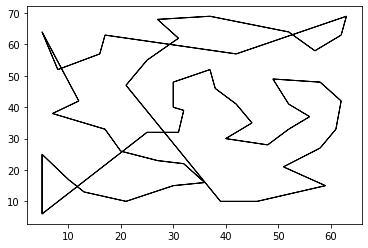

In [36]:
sim.plot_solution()

In [37]:
res = sim.run_sim()

times lowered: 10
times raised:9
times lowered: 7
times raised:12
times lowered: 12
times raised:11
times lowered: 8
times raised:6
times lowered: 4
times raised:7
times lowered: 7
times raised:4
times lowered: 3
times raised:1
times lowered: 1
times raised:2
times lowered: 5
times raised:3
times lowered: 4
times raised:5
times lowered: 5
times raised:5
times lowered: 1
times raised:5
times lowered: 2
times raised:2
times lowered: 2
times raised:4
times lowered: 1
times raised:4
times lowered: 0
times raised:2
times lowered: 1
times raised:2
times lowered: 2
times raised:2
times lowered: 3
times raised:1
times lowered: 1
times raised:0
times lowered: 2
times raised:6
times lowered: 1
times raised:2
times lowered: 2
times raised:4
times lowered: 1
times raised:2
times lowered: 0
times raised:0
times lowered: 0
times raised:2
times lowered: 3
times raised:2
times lowered: 2
times raised:3
times lowered: 1
times raised:3
times lowered: 1
times raised:5
times lowered: 0
times raised:2
time

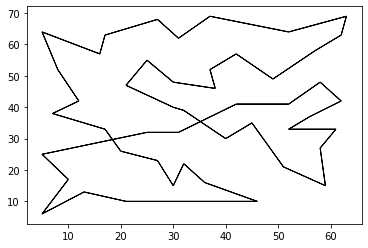

In [38]:
sim.plot_solution()

In [39]:
sim.total_distance()

472.7736222614501

In [40]:
# find the minumum of the simulation
m = res[0][1][0]
for i in range(len(res)):
    for j in range(len(res[i][1])):
        if res[i][1][j]<m:
            m = res[i][1][j]
m

468.76481337496114

In [52]:
def runsims(num_sim=30, temp = 10, stopK = 0.000001, element="swap"):
    sim = AnnealTVS(df, K = temp, stopK = stopK, alpha = 0.95, elementary=element, num_sim = num_sim)
    res = sim.run_sim()
    return res

def plot_solution(solution):
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])

In [53]:
num_sims = 8
results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 60, temp=i*6, stopK=0.0001, element="insert")
                                      for i in range(num_sims))

In [54]:
results_sims

[[(['4',
    '17',
    '37',
    '15',
    '44',
    '42',
    '19',
    '41',
    '13',
    '25',
    '14',
    '6',
    '48',
    '27',
    '51',
    '46',
    '12',
    '47',
    '18',
    '24',
    '23',
    '7',
    '26',
    '8',
    '31',
    '28',
    '3',
    '20',
    '35',
    '36',
    '29',
    '21',
    '50',
    '9',
    '49',
    '10',
    '30',
    '34',
    '16',
    '2',
    '11',
    '32',
    '1',
    '22',
    '38',
    '5',
    '45',
    '33',
    '39',
    '40',
    '43'],
   []),
  (['4',
    '17',
    '37',
    '15',
    '44',
    '42',
    '19',
    '41',
    '13',
    '25',
    '14',
    '6',
    '48',
    '27',
    '51',
    '46',
    '12',
    '47',
    '18',
    '24',
    '23',
    '7',
    '26',
    '8',
    '31',
    '28',
    '3',
    '20',
    '35',
    '36',
    '29',
    '21',
    '50',
    '9',
    '49',
    '10',
    '30',
    '34',
    '16',
    '2',
    '11',
    '32',
    '1',
    '22',
    '38',
    '5',
    '45',
    '33',
    '39',
    '40',